# Modelo para fitrar e classificar resenhas

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
* [Etapa 2. Transformações dos dados](#tranforamation_data)
* [Etapa 3. Modelo](#model)
* [Conclusões](#end)

## Introdução <a id='intro'></a>

A Film Junky Union, uma nova comunidade para entusiastas de filmes clássicos, está desenvolvendo um sistema para filtrar e categorizar resenhas de filmes. O objetivo é treinar um modelo para detectar automaticamente resenhas negativas. Você usará um conjunto de dados de resenhas de filmes do IMDB com rotulagem de polaridade para criar um modelo para classificar resenhas como positivas e negativas. Ele precisará ter um valor F1 de pelo menos 0,85.

### Descrição de dados

- `Abra e examine o arquivo de dados. Caminho para o arquivo:`
/datasets/imdb_reviews.tsv. Baixar o conjunto de dados

[Voltar ao Índice](#back)

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Carregue os dados das consultas, explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Importando bibliotecas necessárias para análise de dados e visualização
import math  # Biblioteca matemática para funções matemáticas
import numpy as np  # Biblioteca para manipulação de arrays e operações numéricas
import pandas as pd  # Biblioteca para manipulação e análise de dados em formato de tabela
import matplotlib  # Biblioteca para criação de gráficos
import matplotlib.pyplot as plt  # Módulo de pyplot para criação de gráficos
import matplotlib.dates as mdates  # Módulo para manipulação de datas em gráficos
import seaborn as sns  # Biblioteca para visualização de dados baseada no matplotlib
from tqdm.auto import tqdm  # Biblioteca para exibir barras de progresso em loops
import warnings  # Biblioteca para emitir avisos

# Ignorando avisos para evitar poluição visual na saída do console
warnings.filterwarnings("ignore")


In [2]:
# Configuração do ambiente para visualização de gráficos em Jupyter Notebook

# Permite que gráficos sejam exibidos diretamente no notebook
%matplotlib inline

# Configura o formato das figuras para 'png', que é um formato de imagem comum
%config InlineBackend.figure_format = 'png'

# Melhora a qualidade dos gráficos em telas de alta definição (HiDPI)
%config InlineBackend.figure_format = 'retina'

# Define o estilo dos gráficos para 'seaborn', que proporciona uma aparência mais estética
plt.style.use('seaborn')


In [3]:
# Integrando a biblioteca tqdm com pandas para exibir barras de progresso em operações de DataFrame
tqdm.pandas()


## Carregar Dados

In [4]:
# Lendo um arquivo TSV (Tab-Separated Values) e armazenando os dados em um DataFrame do pandas
df_reviews = pd.read_csv(
    'C:/Users/gabri/Downloads/Corrigido/Projeto 14/imdb_reviews.tsv',  # Caminho do arquivo
    sep='\t',  # Especifica que o separador de colunas é uma tabulação
    dtype={'votes': 'Int64'}  # Define o tipo da coluna 'votes' como Int64 (inteiro com suporte a valores nulos)
)

In [5]:
# Exibindo informações sobre o DataFrame, como o número de entradas, tipos de dados e valores não nulos
df_reviews.info()

# Adicionando uma linha em branco para melhor legibilidade na saída
print()

# Exibindo uma amostra aleatória de 10 linhas do DataFrame para visualizar os dados
df_reviews.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22824,tt0117093,movie,Mother Night,Mother Night,1996,\N,114,0,"Drama,Romance,War",7.1,4814,"I have not read the novel, or anything other b...",8,pos,1,train,2267
25473,tt0119848,movie,Out to Sea,Out to Sea,1997,\N,106,0,"Comedy,Romance",6.1,7776,Out to Sea was a great movie. I expected comed...,7,pos,1,test,1172
44548,tt0409409,video,USA the Movie,USA the Movie,2005,\N,103,0,Drama,5.2,155,A lot about USA The Movie can be summed up in ...,10,pos,1,test,3162
12714,tt0995029,movie,Fighter,Fighter,2007,\N,100,0,"Action,Drama",6.5,1422,"The film notes describe the main role family, ...",8,pos,1,train,2453
1631,tt0098994,movie,"After Dark, My Sweet","After Dark, My Sweet",1990,\N,114,0,"Crime,Drama,Mystery",6.6,3098,If in the 90's you're adapting a book written ...,7,pos,1,train,7730
23546,tt0465624,movie,My Super Ex-Girlfriend,My Super Ex-Girlfriend,2006,\N,96,0,"Comedy,Romance,Sci-Fi",5.1,60783,Ivan Reitman is something of a savior. The mos...,3,neg,0,train,2086
26951,tt0089841,movie,Prizzi's Honor,Prizzi's Honor,1985,\N,130,0,"Comedy,Crime,Drama",6.7,22136,"Well then, what is it?! I found Nicholson's ch...",4,neg,0,train,4613
6522,tt0331701,movie,Carol's Journey,El viaje de Carol,2002,\N,103,0,Drama,6.7,931,Some unsuspecting films carry a message that r...,8,pos,1,train,5343
26563,tt0152015,movie,Pola X,Pola X,1999,\N,134,0,"Drama,Romance",5.8,4335,No one would ever question that director Leos ...,9,pos,1,test,11556
39023,tt0961206,video,The Legend of Bloody Jack,The Legend of Bloody Jack,2007,\N,84,0,Horror,2.7,325,Guys who-ever even THINKS about watching this ...,2,neg,0,train,6033


In [6]:
# Gerando estatísticas descritivas para colunas numéricas do DataFrame
df_reviews.describe()


,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


### Valores ausentes <a id='missing_values'></a>

In [7]:
# Verificando e somando o número de valores ausentes (NaN) em cada coluna do DataFrame
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [8]:
# Ordenando o DataFrame pelo índice atual e modificando-o no local
df_reviews.sort_index(inplace=True)


In [9]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


## AED

Vamos verificar o número de filmes e resenhas ao longo dos anos.

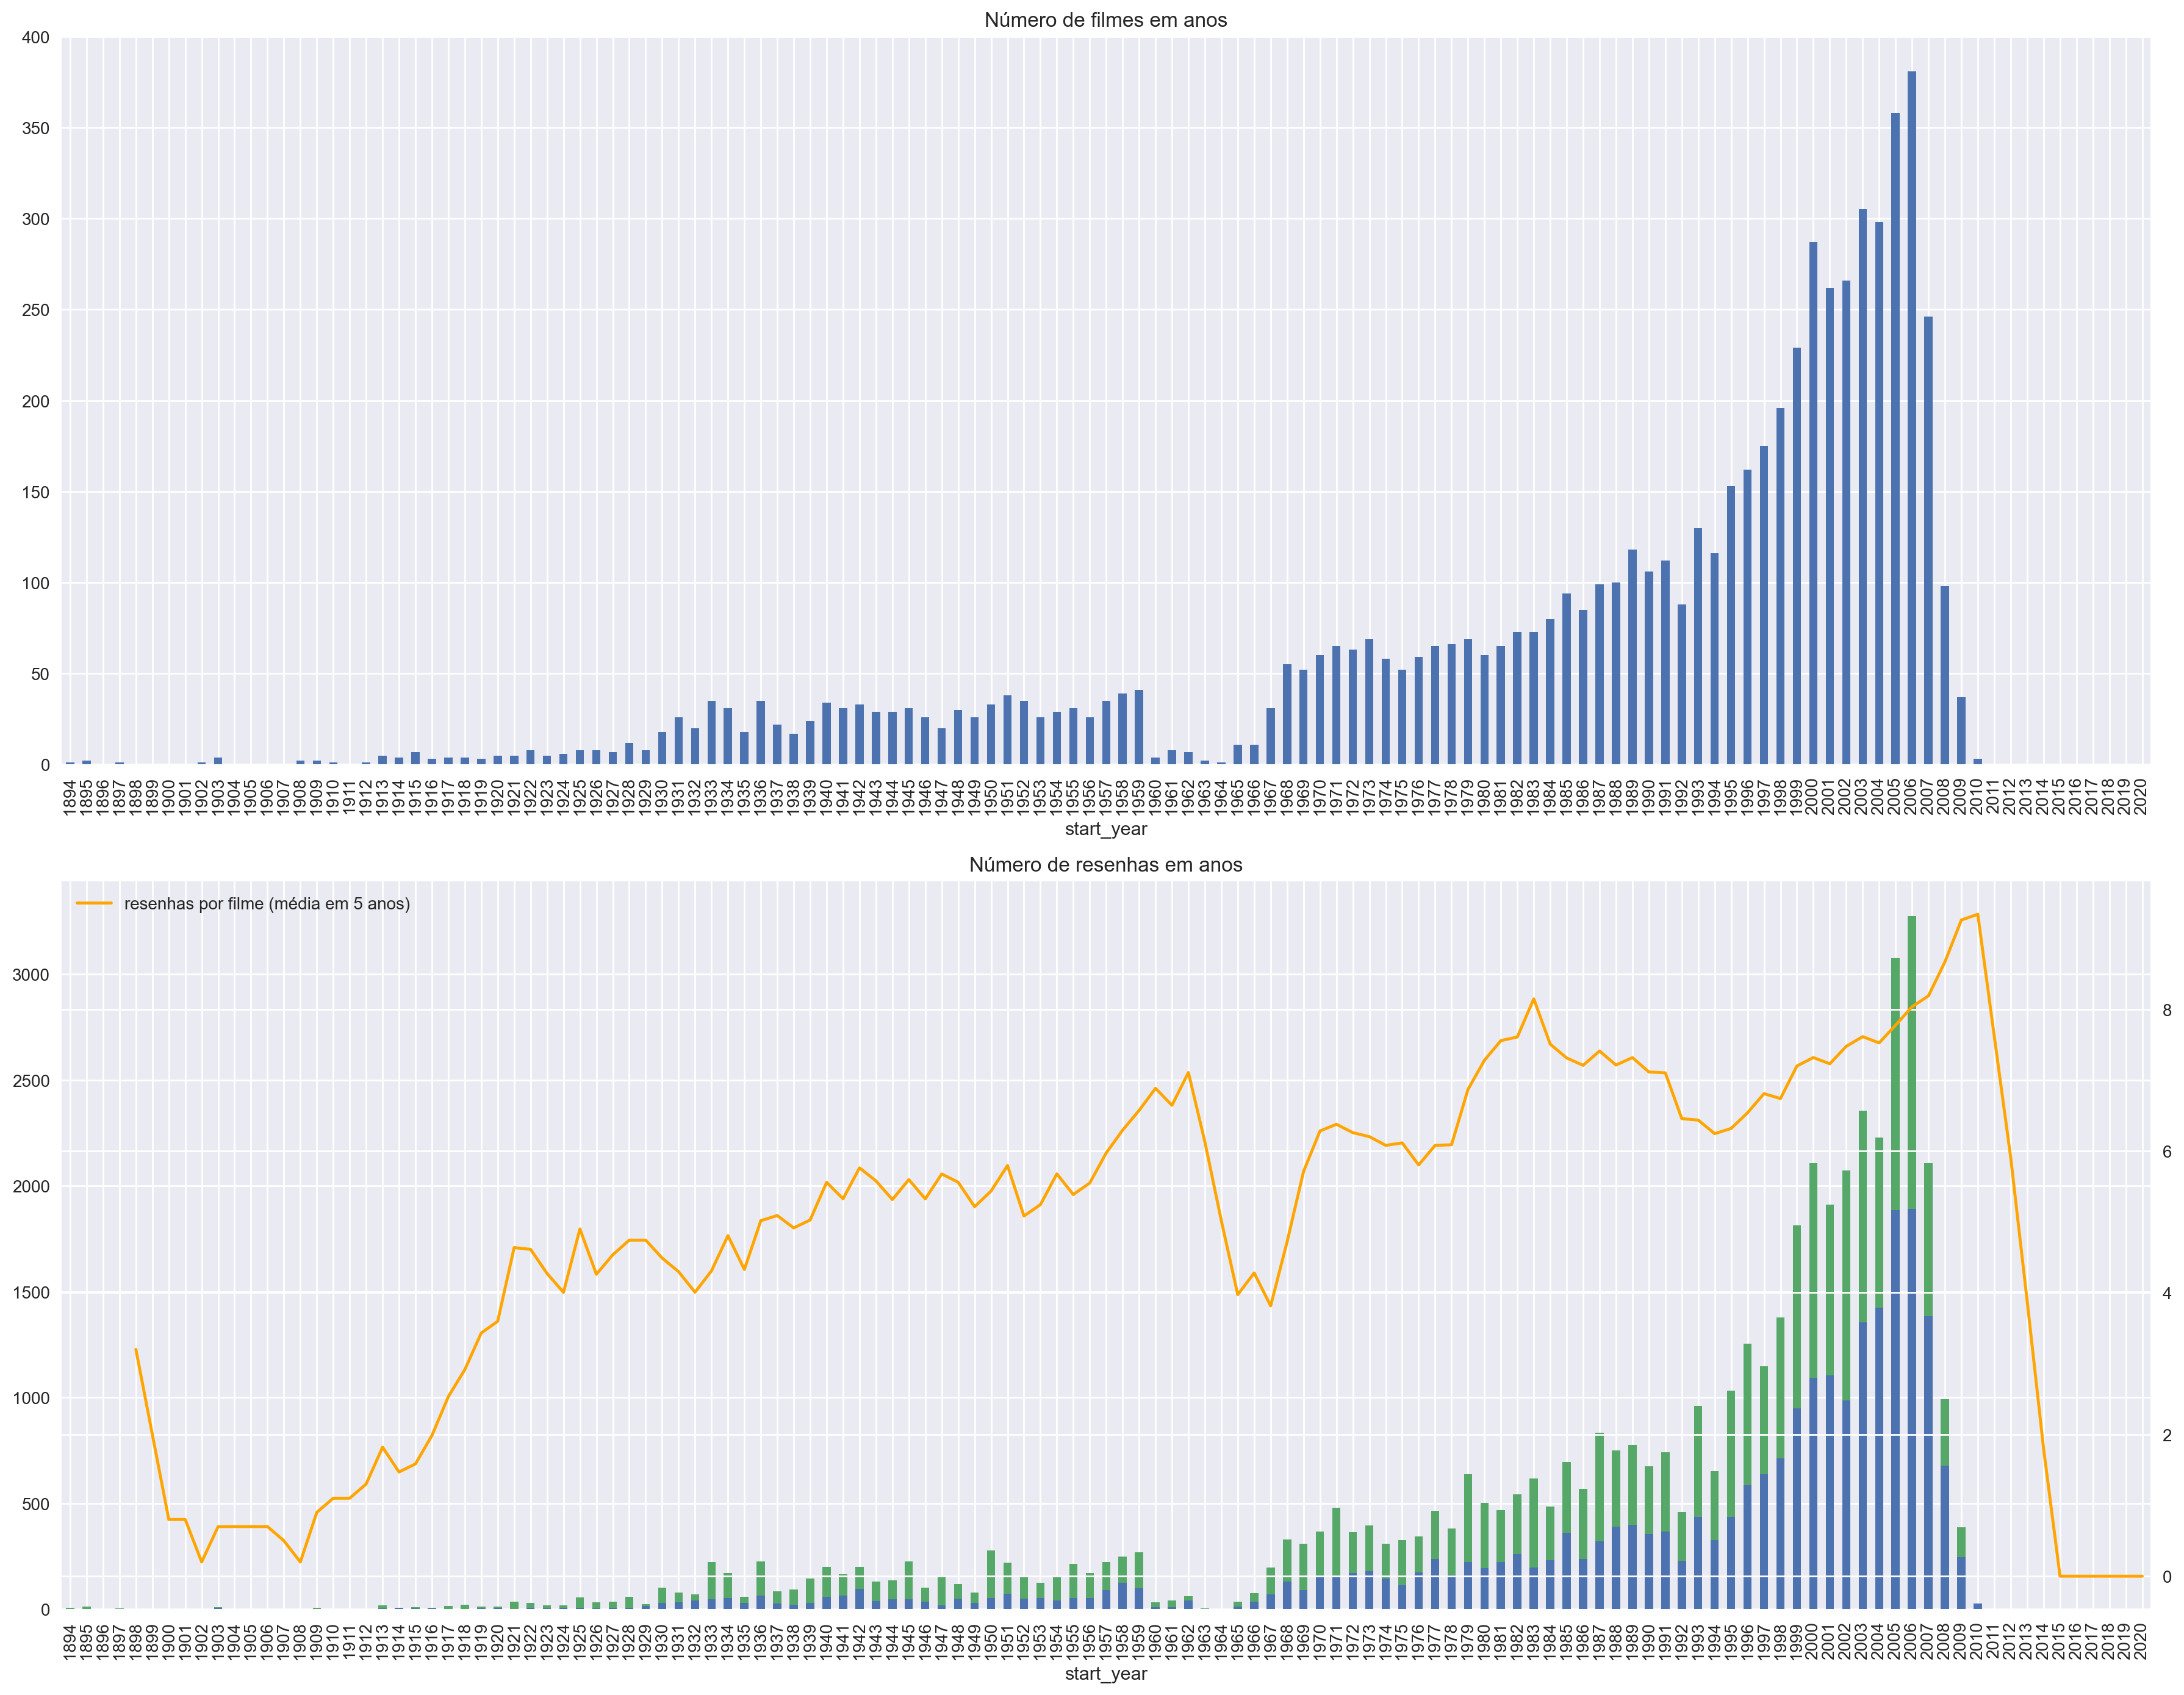

In [10]:
# Criando uma figura com 2 subgráficos, organizados em 2 linhas e 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(18, 14))

# Primeiro subgráfico
ax = axs[0]

# Contando o número de filmes por ano, removendo duplicatas
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()

# Reindexando para incluir todos os anos até 2021, preenchendo com 0 onde não há dados
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)

# Plotando o número de filmes por ano como um gráfico de barras
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de filmes em anos')

# Segundo subgráfico
ax = axs[1]

# Agrupando por ano e polaridade das resenhas, contando as ocorrências
dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()

# Reindexando para incluir todos os anos até 2021, preenchendo com 0 onde não há dados
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

# Plotando o número de resenhas por ano como um gráfico de barras empilhadas
dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

# Calculando a média de resenhas por filme
dft2_counts = df_reviews['start_year'].value_counts().sort_index()
dft2_counts = dft2_counts.reindex(index=np.arange(dft2_counts.index.min(), max(dft2_counts.index.max(), 2021))).fillna(0)
dft3 = (dft2_counts / dft1).fillna(0)

# Criando um eixo Y secundário para a média de resenhas por filme
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='resenhas por filme (média em 5 anos)', ax=axt)

# Unindo as legendas dos dois eixos
lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de resenhas em anos')

# Ajustando o layout da figura
fig.tight_layout()


Vamos verificar a distribuição do número de resenhas por filme com a contagem exata e o EDK (Estimativa de densidade kernel - só para saber como pode diferir da contagem exata)

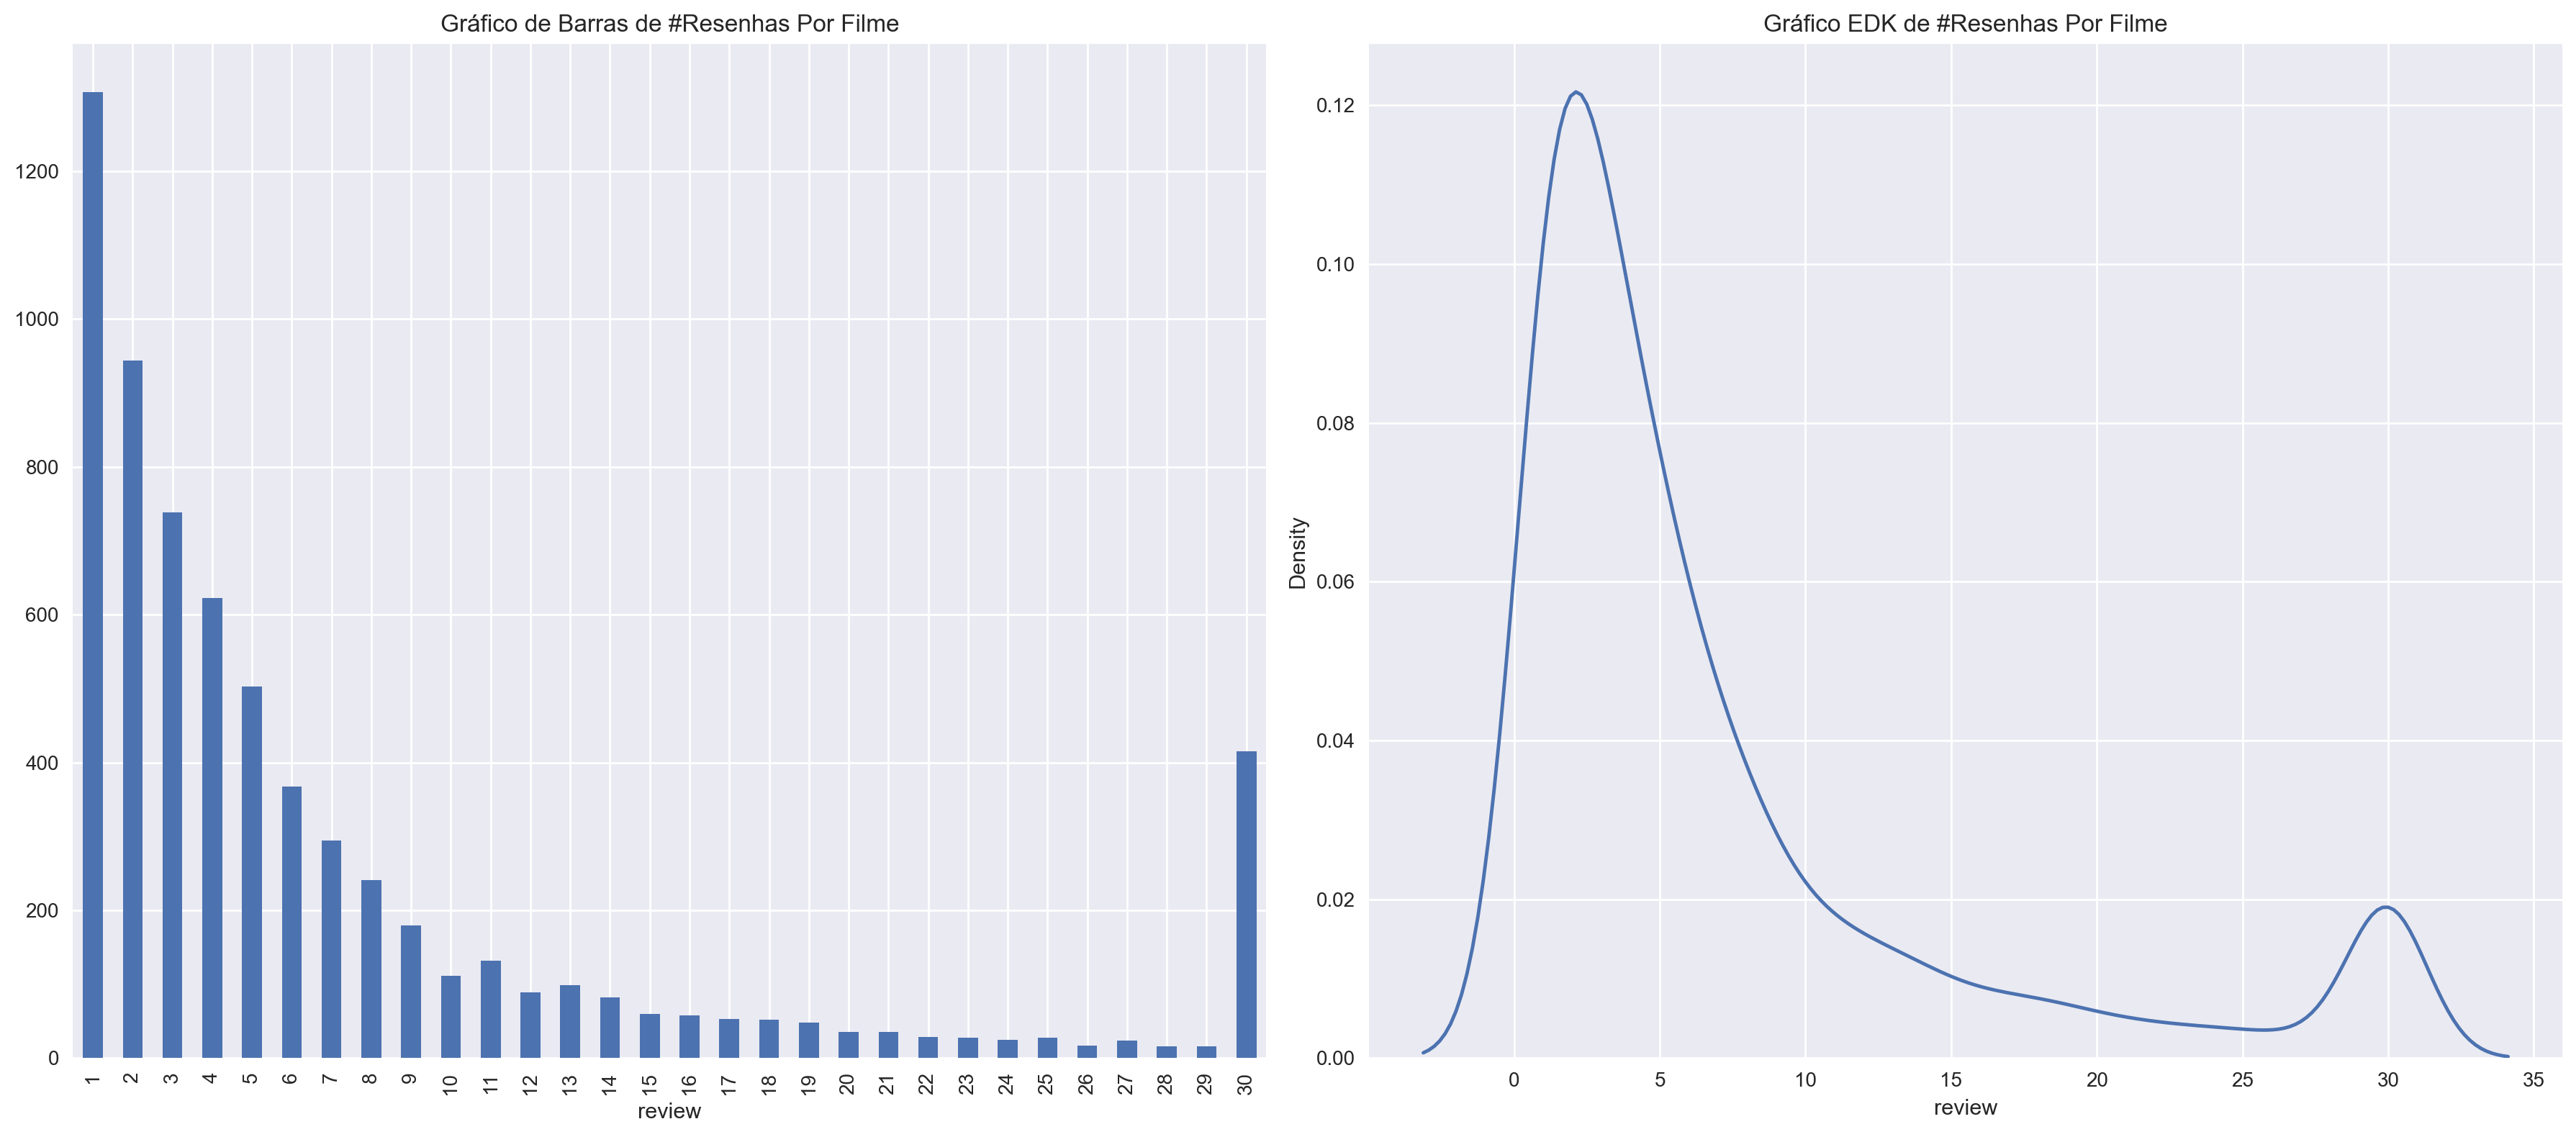

In [11]:
# Criando uma figura com 2 subgráficos, organizados em 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Primeiro subgráfico: Gráfico de Barras
ax = axs[0]
# Contando o número de resenhas por filme e contando a frequência de cada contagem
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()

# Plotando o gráfico de barras
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de Barras de #Resenhas Por Filme')

# Segundo subgráfico: Gráfico de Densidade Kernel (KDE)
ax = axs[1]
# Contando o número de resenhas por filme
dft = df_reviews.groupby('tconst')['review'].count()

# Plotando o gráfico de densidade
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico EDK de #Resenhas Por Filme')

# Ajustando o layout da figura
fig.tight_layout()


In [12]:
# Contando a frequência de cada valor na coluna 'pos' do DataFrame df_reviews
df_reviews['pos'].value_counts()


pos
0    23715
1    23616
Name: count, dtype: int64

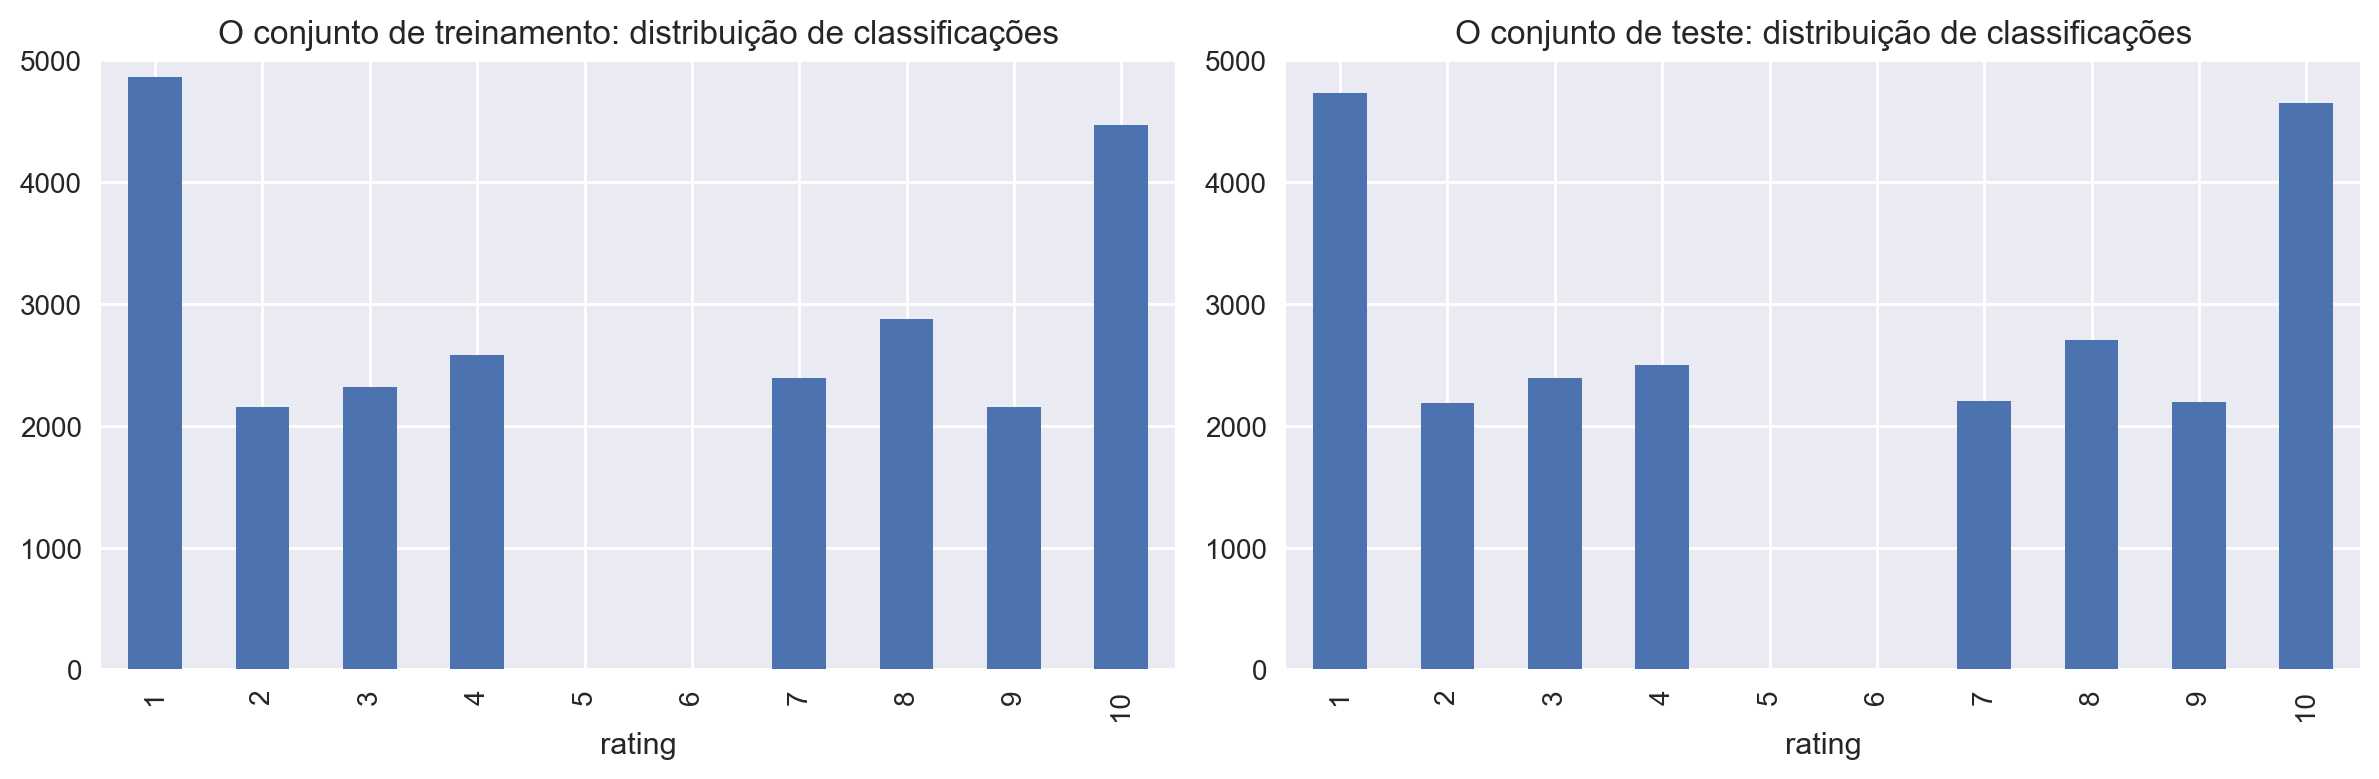

In [13]:
# Criando uma figura com 2 subgráficos, organizados em 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Primeiro subgráfico: Distribuição de classificações do conjunto de treinamento
ax = axs[0]
# Filtrando o DataFrame para o conjunto de treinamento e contando as classificações
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()

# Reindexando para incluir todas as classificações de 1 a 10, preenchendo com 0 onde não há dados
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)

# Plotando o gráfico de barras
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])  # Definindo o limite do eixo y
ax.set_title('O conjunto de treinamento: distribuição de classificações')

# Segundo subgráfico: Distribuição de classificações do conjunto de teste
ax = axs[1]
# Filtrando o DataFrame para o conjunto de teste e contando as classificações
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()

# Reindexando para incluir todas as classificações de 1 a 10, preenchendo com 0 onde não há dados
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)

# Plotando o gráfico de barras
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])  # Definindo o limite do eixo y
ax.set_title('O conjunto de teste: distribuição de classificações')

# Ajustando o layout da figura
fig.tight_layout()


Distribuição de resenhas negativas e positivas ao longo dos anos para duas partes do conjunto de dados

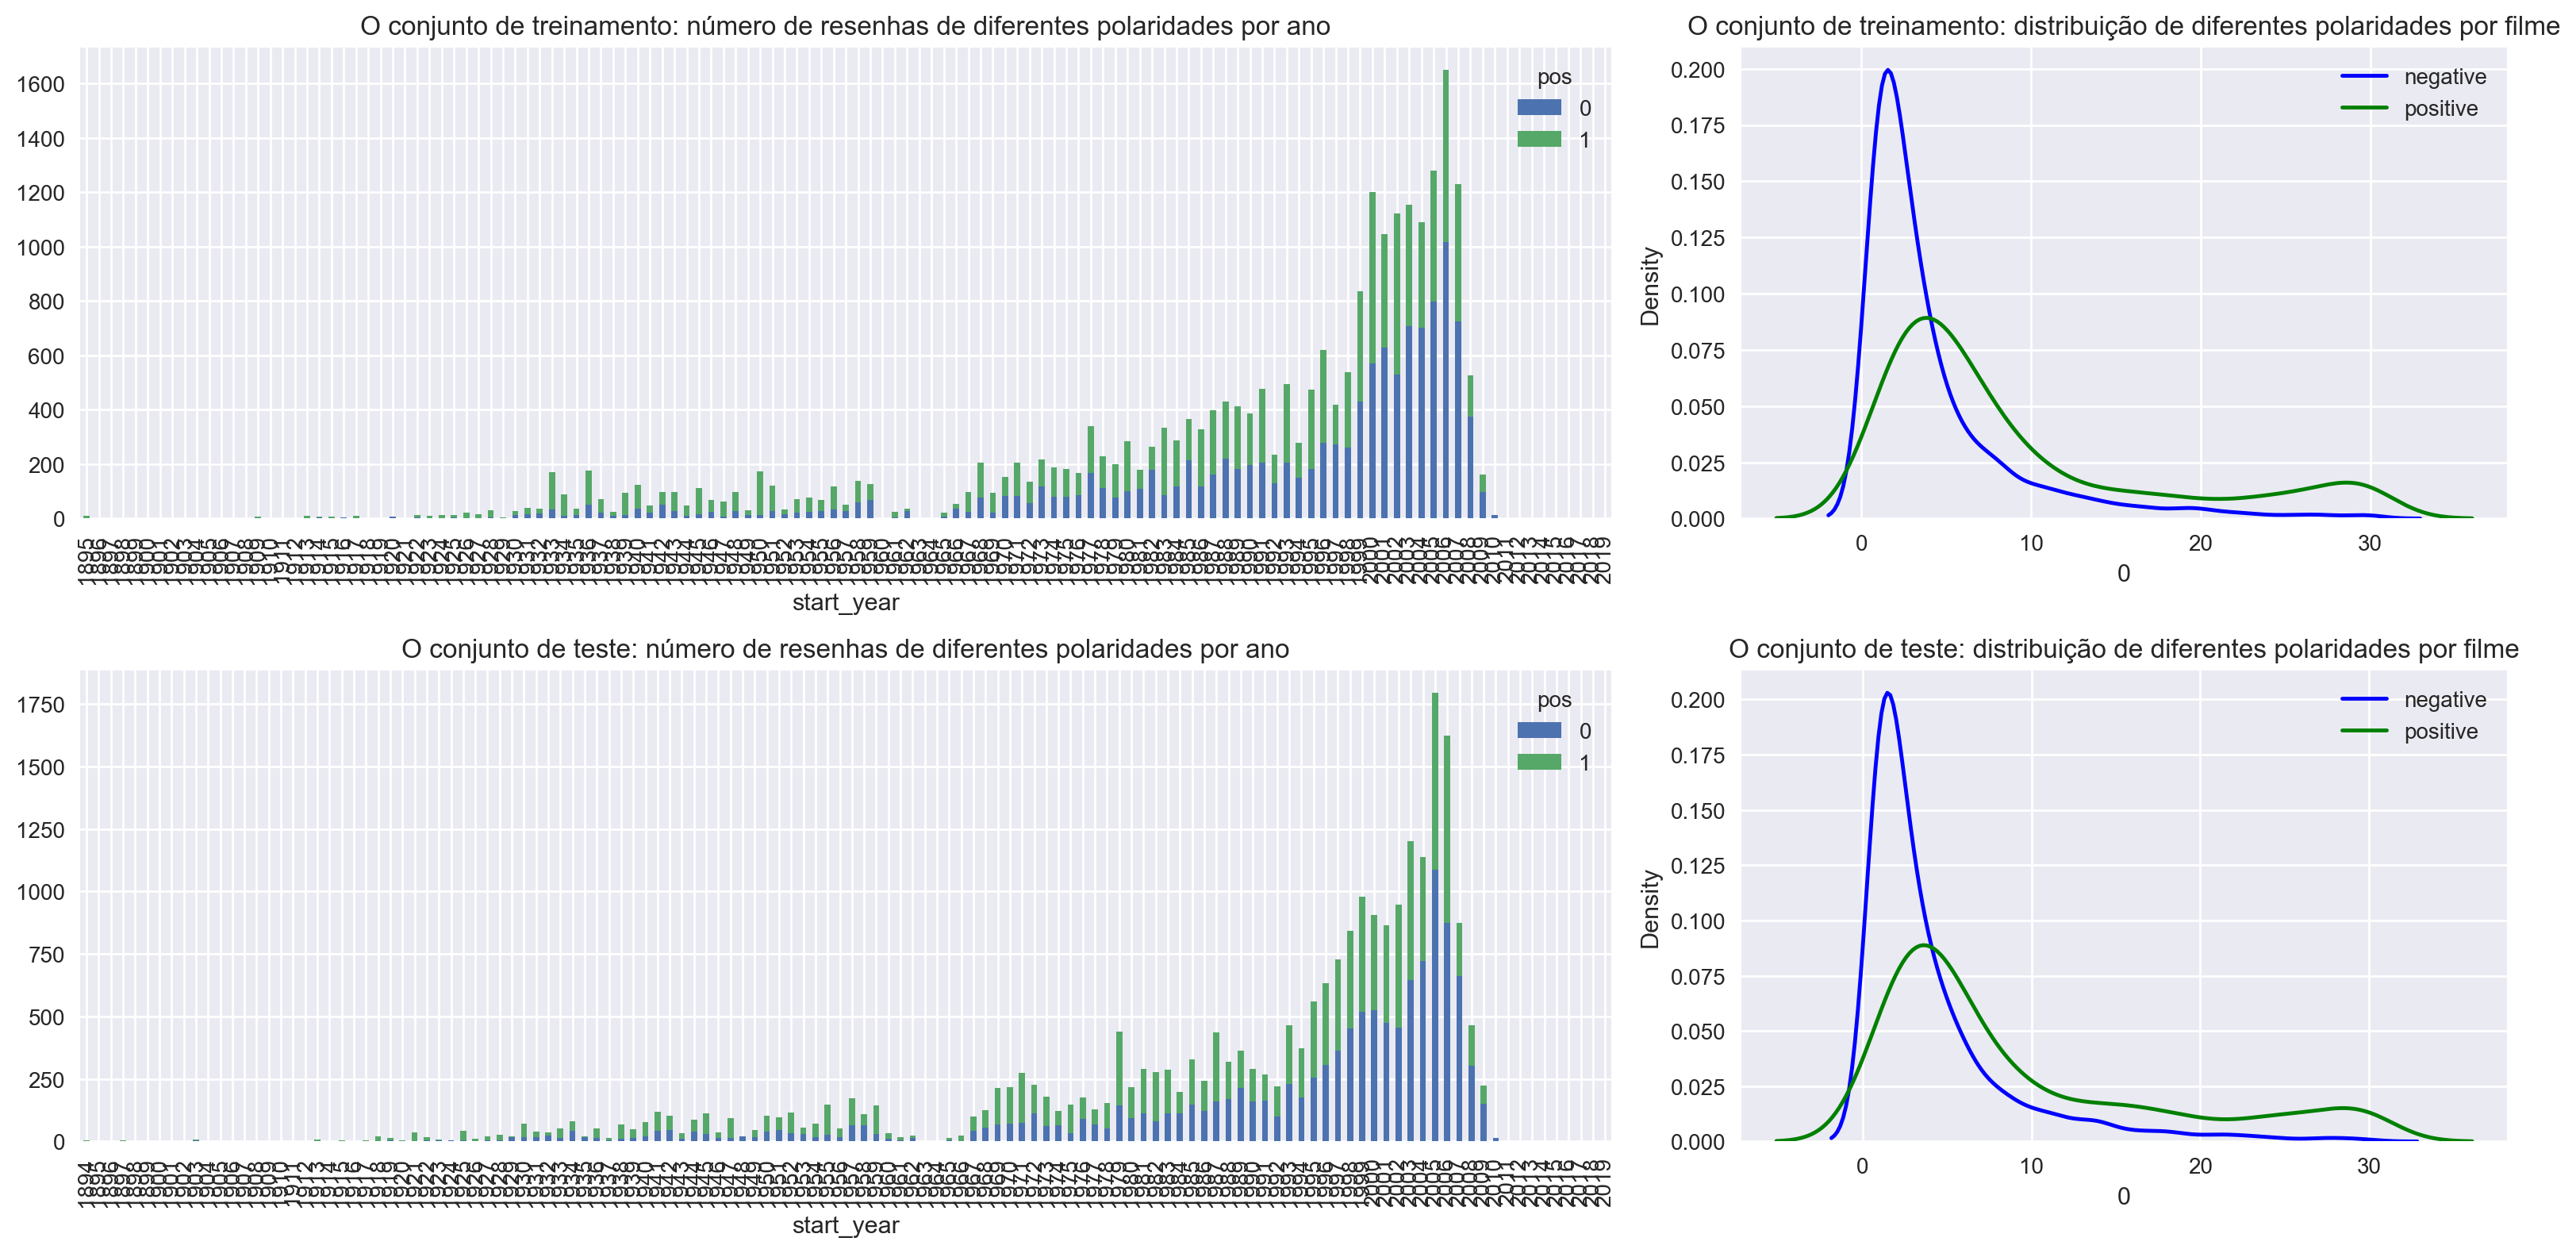

In [14]:
# Criando uma figura com 4 subgráficos, organizados em 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

# Primeiro subgráfico: Distribuição de resenhas por ano no conjunto de treinamento
ax = axs[0][0]
dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')  # Convertendo o índice para inteiro
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)  # Reindexando para incluir todos os anos
dft.plot(kind='bar', stacked=True, ax=ax)  # Plotando gráfico de barras empilhadas
ax.set_title('O conjunto de treinamento: número de resenhas de diferentes polaridades por ano')

# Segundo subgráfico: Distribuição de polaridades por filme no conjunto de treinamento
ax = axs[0][1]
dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)  # KDE para resenhas negativas
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)  # KDE para resenhas positivas
ax.legend()
ax.set_title('O conjunto de treinamento: distribuição de diferentes polaridades por filme')

# Terceiro subgráfico: Distribuição de resenhas por ano no conjunto de teste
ax = axs[1][0]
dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')  # Convertendo o índice para inteiro
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)  # Reindexando para incluir todos os anos
dft.plot(kind='bar', stacked=True, ax=ax)  # Plotando gráfico de barras empilhadas
ax.set_title('O conjunto de teste: número de resenhas de diferentes polaridades por ano')

# Quarto subgráfico: Distribuição de polaridades por filme no conjunto de teste
ax = axs[1][1]
dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)  # KDE para resenhas negativas
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)  # KDE para resenhas positivas
ax.legend()
ax.set_title('O conjunto de teste: distribuição de diferentes polaridades por filme')

# Ajustando o layout da figura
fig.tight_layout()



## Procedimento de Avaliação

Compondo uma rotina de avaliação que pode ser utilizada para todos os modelos deste projeto

In [15]:
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, train_features, train_target, test_features, test_target):
    eval_stats = {}
    
    # Criando uma figura com 3 subgráficos
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        eval_stats[type] = {}
        
        # Previsões do modelo
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # Cálculo da métrica F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds]
        eval_stats[type]['F1'] = f1_scores[0]
        
        # Cálculo da curva ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # Curva de precisão-revocação
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        # Definindo a cor com base no tipo de conjunto
        color = 'blue' if type == 'train' else 'green'

        # Gráfico F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # Marcando alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Threshold')
        ax.set_ylabel('F1 Score')
        ax.legend(loc='lower center')
        ax.set_title('Valor F1') 

        # Gráfico ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # Marcando alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title('Curva ROC')
        
        # Gráfico de precisão-revocação
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # Marcando alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend(loc='lower center')
        ax.set_title('Curva de Precisão-Revocação')        

        # Cálculo da acurácia
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
    
    # Criando um DataFrame para exibir as estatísticas de avaliação
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return



## Etapa 2. Transformação de dados <a id='tranforamation_data'>

Assumimos que todos os modelos abaixo aceitam textos em letras minúsculas e sem dígitos, sinais de pontuação, etc.

In [16]:
import re

def preprocess_reviews(df):
    # Converte as resenhas para minúsculas
    df['review_norm'] = df['review'].str.lower()
    
    # Remove números das resenhas
    df['review_norm'] = df['review_norm'].apply(lambda x: re.sub(r'[0-9]+', '', x))
    
    return df


In [17]:
df_reviews = preprocess_reviews(df_reviews)

## Etapa 3. Modelo <a id='model'></a>

Felizmente, todo o conjunto de dados já está dividido em partes de treinamento/teste. A opção correspondente é 'ds_part'.

In [18]:
# Filtrando o DataFrame para criar conjuntos de treinamento e teste
df_reviews_train = df_reviews.query('ds_part == "train"').copy()  # Conjunto de treinamento
df_reviews_test = df_reviews.query('ds_part == "test"').copy()    # Conjunto de teste

# Extraindo os alvos (labels) para os conjuntos de treinamento e teste
train_target = df_reviews_train['pos']  # Alvos do conjunto de treinamento
test_target = df_reviews_test['pos']     # Alvos do conjunto de teste

# Exibindo as formas dos DataFrames de treinamento e teste
print(df_reviews_train.shape)  # Imprime a forma do conjunto de treinamento
print(df_reviews_test.shape)    # Imprime a forma do conjunto de teste


(23796, 18)
(23535, 18)


## Trabalhando com modelos

### Modelo 0 - Constante

In [19]:
from sklearn.dummy import DummyRegressor  # Importa o DummyRegressor, que serve como um modelo de referência
from sklearn.metrics import accuracy_score  # Importa a função para calcular a acurácia das previsões


In [20]:
# Separando as características e os alvos do conjunto de treinamento
train_features_0 = df_reviews_train.drop(['pos'], axis=1)  # Remove a coluna 'pos' para obter as características
train_target_0 = df_reviews_train['pos']  # Obtém a coluna 'pos' como alvo do treinamento

# Separando as características e os alvos do conjunto de teste
test_features_0 = df_reviews_test.drop(['pos'], axis=1)  # Remove a coluna 'pos' para obter as características
test_target_0 = df_reviews_test['pos']  # Obtém a coluna 'pos' como alvo do teste


In [21]:
from sklearn.dummy import DummyRegressor

# Criação de um DummyRegressor com estratégia constante
dummy_regr = DummyRegressor(strategy="constant", constant=1)  # O modelo sempre prevê o valor 1


In [22]:
# Ajuste do DummyRegressor aos dados de treinamento
dummy_regr.fit(train_features_0, train_target_0)  # Treina o modelo com as características e alvos do conjunto de treinamento


DummyRegressor(constant=1, strategy='constant')

In [23]:
# Previsão usando o DummyRegressor para o conjunto de treinamento
pred_dummy_regr_train = dummy_regr.predict(train_features_0)  # Faz previsões com as características do conjunto de treinamento


In [24]:
# Cálculo da acurácia das previsões do DummyRegressor no conjunto de treinamento
accuracy_train = accuracy_score(train_target_0, pred_dummy_regr_train)  # Compara os alvos reais com as previsões
accuracy_train  # Exibe a acurácia calculada


0.4994116658261893

In [25]:
# Previsão usando o DummyRegressor para o conjunto de teste
pred_dummy_regr_test = dummy_regr.predict(test_features_0)  # Faz previsões com as características do conjunto de teste


In [26]:
# Cálculo da acurácia das previsões do DummyRegressor no conjunto de teste
accuracy_test = accuracy_score(test_target_0, pred_dummy_regr_test)  # Compara os alvos reais com as previsões
accuracy_test  # Exibe a acurácia calculada


0.4984916082430423

Modelo 0 não se saiu tão bem pois é um modelo de DummyRegressor é um modelo muito simples que faz previsões baseadas em estratégias ingênuas, como a média ou a mediana dos valores de treinamento. Essas estratégias podem não ser adequadas para capturar a complexidade dos dados, resultando em baixa acurácia

### Modelo 1 - NLTK, TF-IDF e Regressão Linear

TF-IDF

In [27]:
import nltk  # Importa a biblioteca NLTK para processamento de linguagem natural

# Importação de classes do scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer  # Para transformar texto em uma matriz TF-IDF
from sklearn.linear_model import LogisticRegression  # Para usar a regressão logística como modelo

# Importação de stopwords do NLTK
from nltk.corpus import stopwords  # Para acessar palavras comuns que podem ser ignoradas na análise

# Download de recursos do NLTK
nltk.download('punkt')  # Para tokenização de texto
nltk.download('wordnet')  # Para lematização (reduzir palavras à sua forma base)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Separando as características e os alvos do conjunto de treinamento
train_features_1 = df_reviews_train['review_norm']  # Obtém a coluna 'review_norm' como características
train_target_1 = df_reviews_train['pos']  # Obtém a coluna 'pos' como alvo do treinamento

# Separando as características e os alvos do conjunto de teste
test_features_1 = df_reviews_test['review_norm']  # Obtém a coluna 'review_norm' como características
test_target_1 = df_reviews_test['pos']  # Obtém a coluna 'pos' como alvo do teste


In [29]:
# Obtendo a forma do conjunto de características de treinamento
train_features_shape = train_features_1.shape
train_features_shape  # Exibe a forma das características de treinamento


(23796,)

In [30]:
# Definindo as stopwords em inglês como uma lista
stop_words = list(stopwords.words('english'))

In [31]:
# Criando o vetor TF-IDF com a lista de stopwords
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stop_words, max_features=60119)

In [32]:
# Transformando as características de treinamento em uma matriz TF-IDF
x_train_vec_1 = tfidf_vectorizer_1.fit_transform(train_features_1)

In [33]:
# Inicializa o modelo de Regressão Logística
lr = LogisticRegression()  # Cria uma instância do modelo de Regressão Logística

In [34]:
# Ajusta o modelo de regressão logística aos dados de treinamento
lr.fit(x_train_vec_1, train_target_1)

LogisticRegression()

In [35]:
# Transforma as características de teste em uma representação vetorial usando o TF-IDF
x_test_vec_1 = tfidf_vectorizer_1.transform(test_features_1)

# Obtém a forma (dimensões) da matriz de características transformadas
x_test_vec_1.shape = x_test_vec_1.shape

          train  test
Accuracy   0.94  0.88
F1         0.67  0.67
APS        0.98  0.95
ROC AUC    0.98  0.95


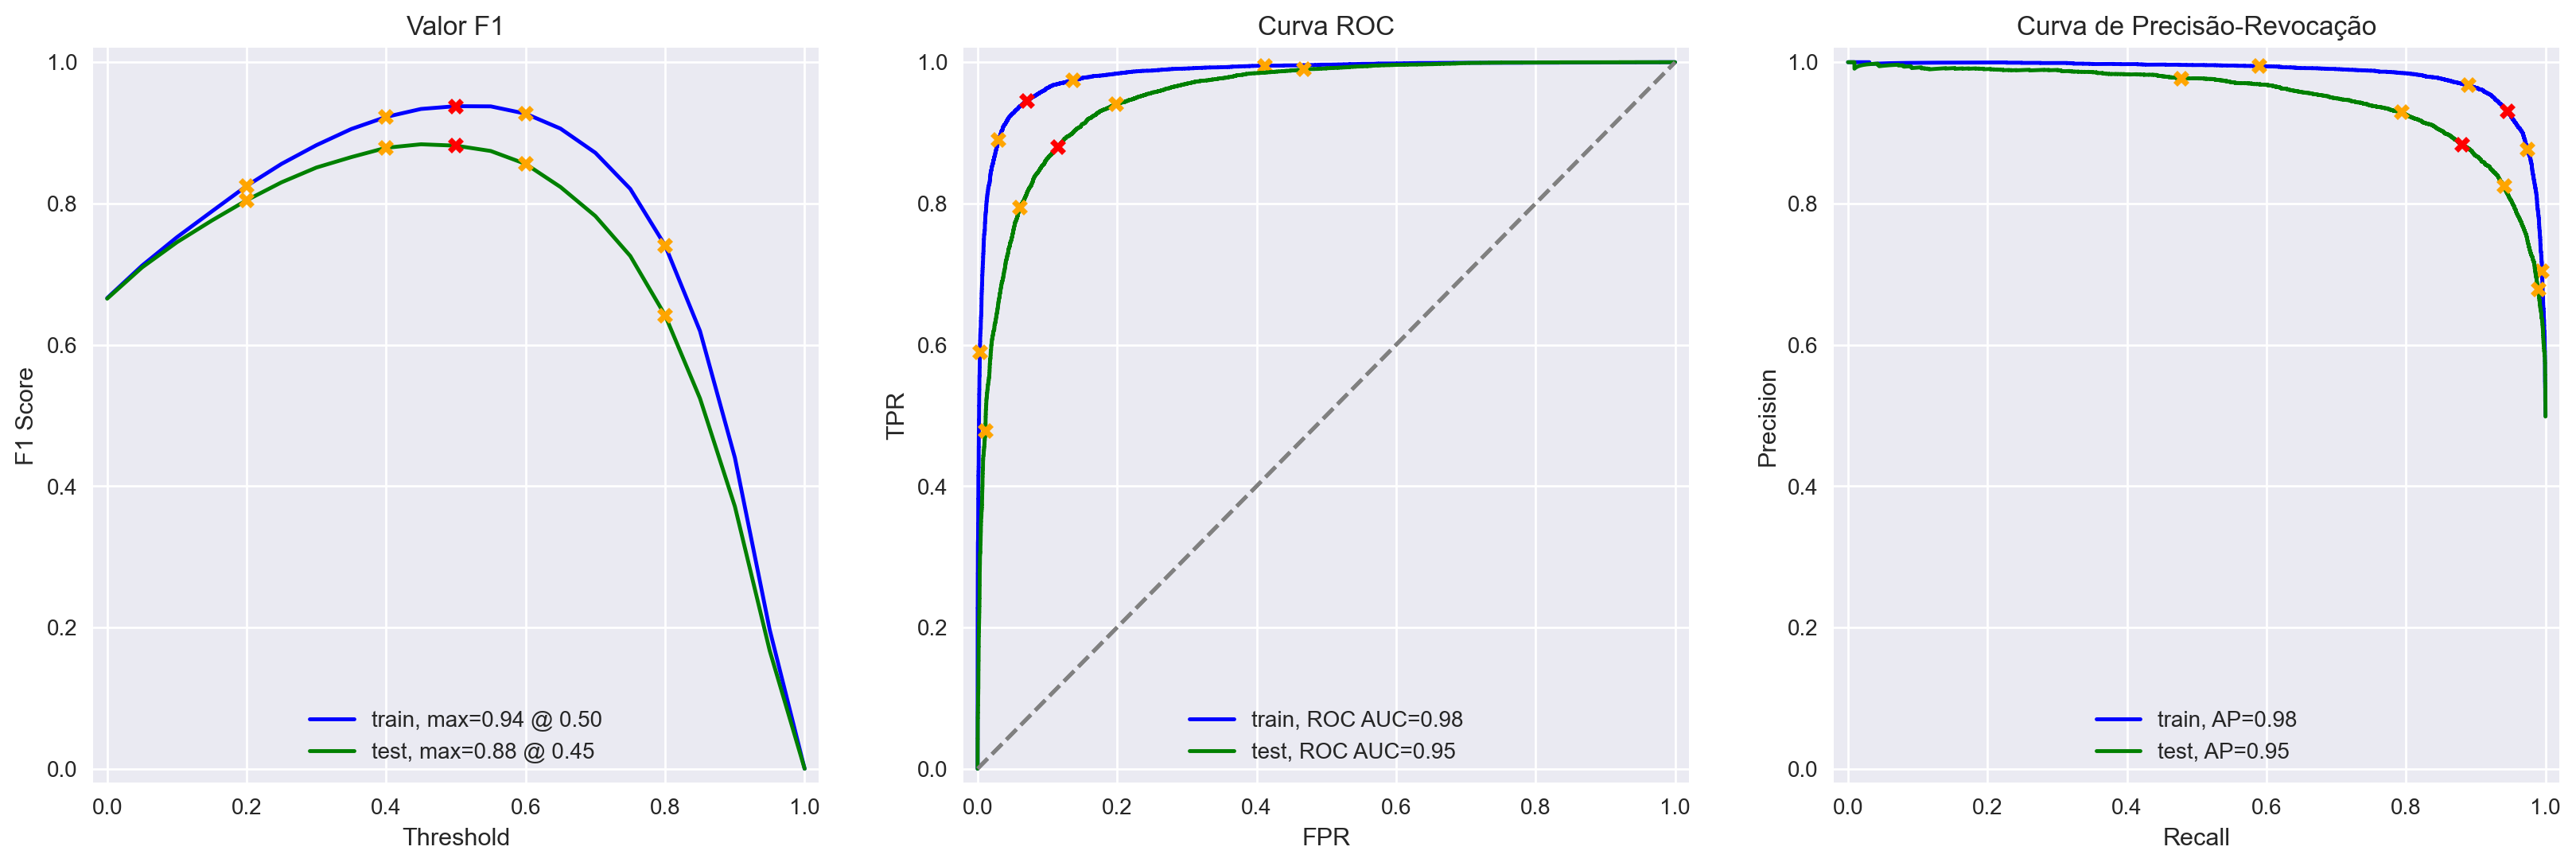

In [36]:
# Avalia o desempenho do modelo de regressão logística
evaluate_model(lr, x_train_vec_1, train_target_1, x_test_vec_1, test_target_1)

O modelo 1 se mostrou suficiente para ultrapassar a meta de Acurácia.

### Modelo 3 - spaCy, TF-IDF e Regressão Linear

In [37]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Importa a biblioteca spaCy
import spacy

In [39]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
      --------------------------------------- 0.2/12.8 MB 2.0 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 11.3 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.8 MB 20.8 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 35.7 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 93.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 65.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
# Carrega o modelo de linguagem pré-treinado 'en_core_web_sm' do spaCy
# Desabilita os componentes 'parser' e 'ner' para melhorar o desempenho
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [41]:
def text_preprocessing_3(text):
    # Processa o texto de entrada usando o modelo de linguagem spaCy
    doc = nlp(text)
    
    # Extrai os lemas dos tokens do texto processado
    # O código original estava filtrando tokens que não são stopwords, mas esta linha inclui todos os lemas
    tokens = [token.lemma_ for token in doc]
    
    # Retorna os lemas como uma única string, juntando-os com espaços
    return ' '.join(tokens)

In [42]:
# Aplica a função de pré-processamento de texto a cada avaliação normalizada no DataFrame df_reviews_train
df_reviews_train['review_tok'] = df_reviews_train['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23796 [00:00<?, ?it/s]

In [43]:
# Aplica a função de pré-processamento de texto a cada avaliação normalizada no DataFrame df_reviews_test
df_reviews_test['review_tok'] = df_reviews_test['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23535 [00:00<?, ?it/s]

In [44]:
# Extrai as características (avaliações tokenizadas) do DataFrame de treinamento
train_features_3 = df_reviews_train['review_tok']

# Extrai os rótulos (classes) correspondentes às avaliações no DataFrame de treinamento
train_target_3 = df_reviews_train['pos']

# Extrai as características (avaliações tokenizadas) do DataFrame de teste
test_features_3 = df_reviews_test['review_tok']

# Extrai os rótulos (classes) correspondentes às avaliações no DataFrame de teste
test_target_3 = df_reviews_test['pos']

In [45]:
# Cria uma instância do TfidfVectorizer com uma lista de stop words personalizada
tfidf_vectorizer_3 = TfidfVectorizer(stop_words=stop_words)

In [46]:
# Aplica o TfidfVectorizer aos dados de treinamento e transforma as características em uma matriz TF-IDF
x_train_vec_3 = tfidf_vectorizer_3.fit_transform(train_features_3)

# Obtém as dimensões da matriz resultante
x_train_vec_3.shape

(23796, 60051)

In [47]:
# Ajusta o modelo de regressão logística aos dados de treinamento
lr.fit(x_train_vec_3, train_target_3)

LogisticRegression()

In [48]:
# Transforma as características de teste em uma representação vetorial usando o TfidfVectorizer treinado
x_test_vec_3 = tfidf_vectorizer_3.transform(test_features_3)

# Obtém as dimensões da matriz de características transformadas
x_test_vec_3.shape

(23535, 60051)

          train  test
Accuracy   0.93  0.88
F1         0.67  0.67
APS        0.98  0.95
ROC AUC    0.98  0.95


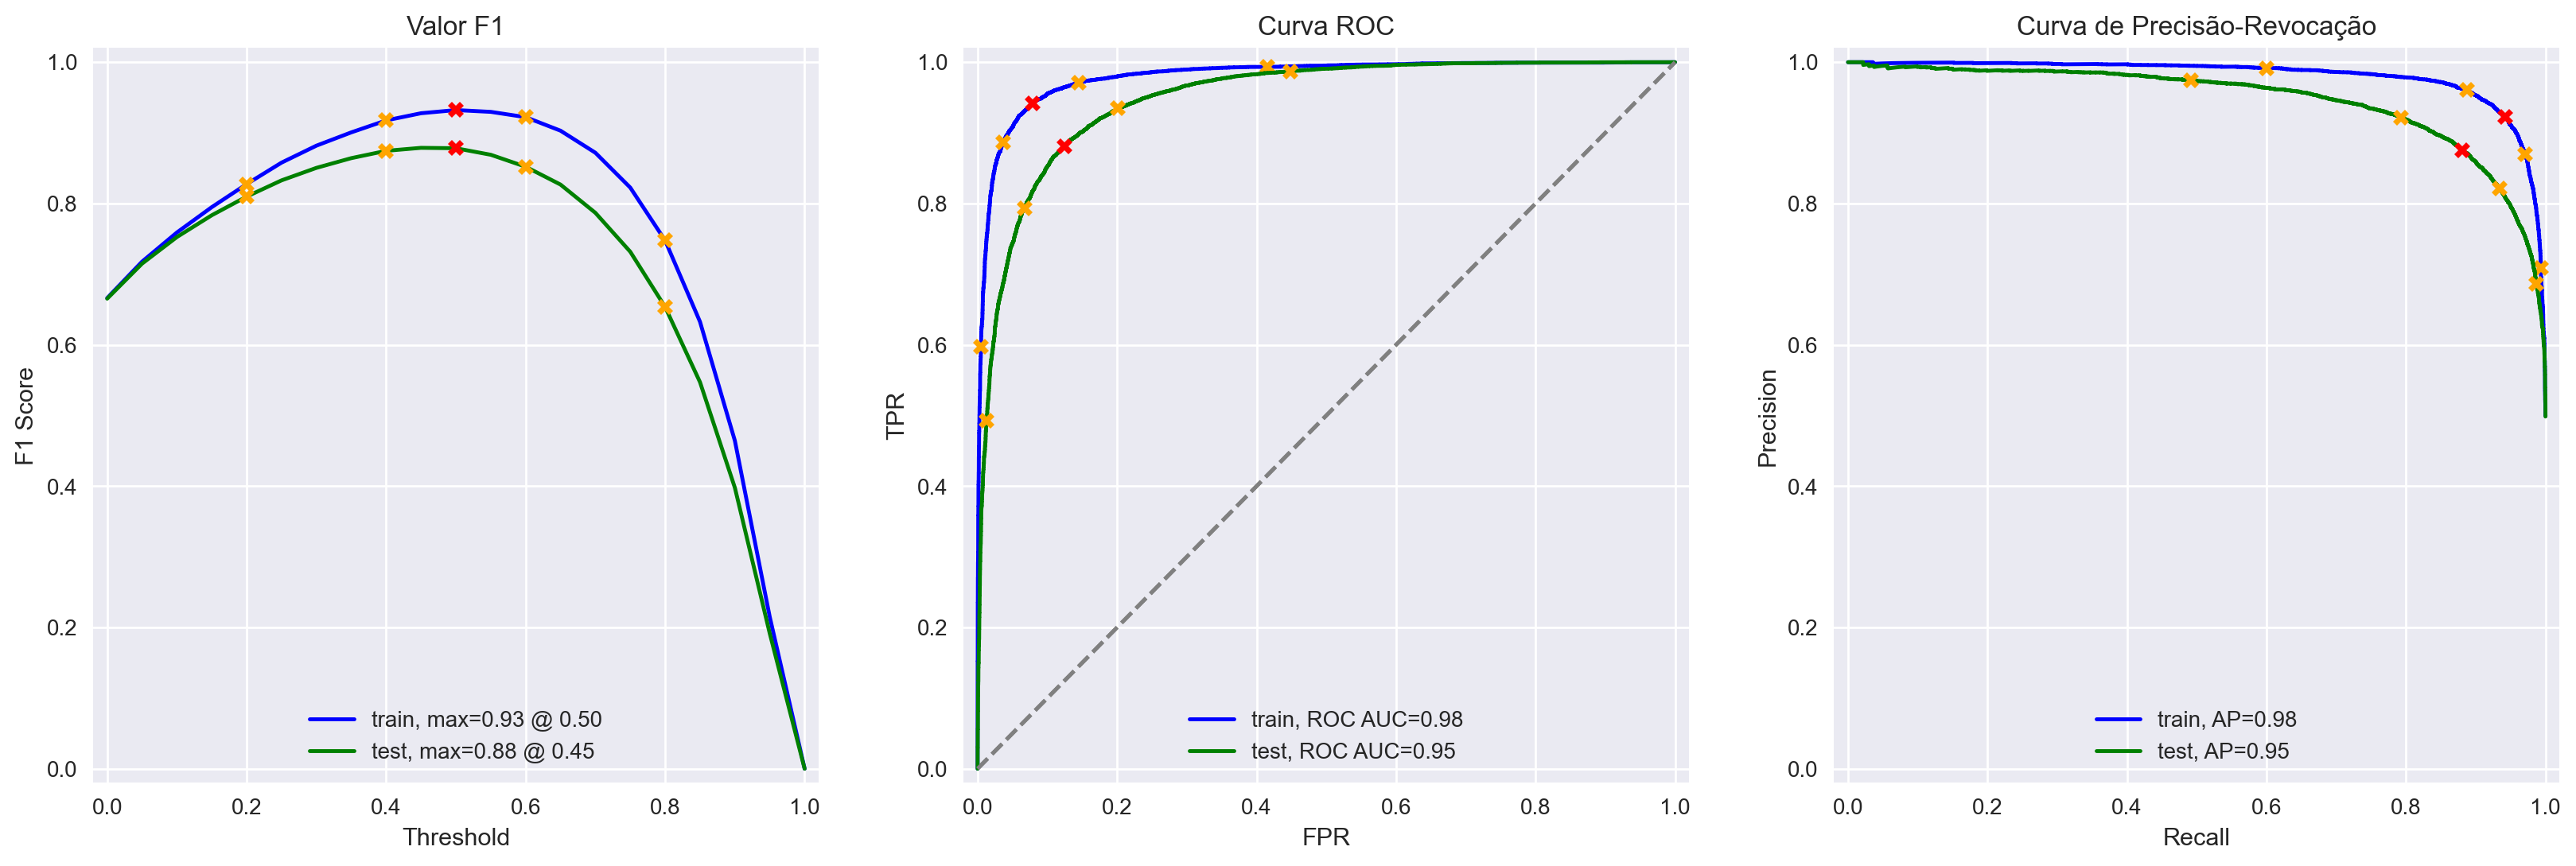

In [49]:
# Avalia o desempenho do modelo de regressão logística
evaluate_model(lr, x_train_vec_3, train_target_3, x_test_vec_3, test_target_3)

O modelo 3 se mostrou suficiente para ultrapassar a meta de Acurácia.

### Modelo 4 - SpaCy, TF-IDF e LGBMClassifier

In [50]:
# Importa a biblioteca LightGBM e a renomeia como 'lgb' para facilitar o uso
import lightgbm as lgb

# Importa a classe LGBMClassifier do módulo lightgbm, que é usada para tarefas de classificação
from lightgbm import LGBMClassifier

In [51]:
# Extrai as características (avaliações tokenizadas) do DataFrame de treinamento
train_features_4 = df_reviews_train['review_tok']

# Extrai os rótulos (classes) correspondentes às avaliações no DataFrame de treinamento
train_target_4 = df_reviews_train['pos']

# Extrai as características (avaliações tokenizadas) do DataFrame de teste
test_features_4 = df_reviews_test['review_tok']

# Extrai os rótulos (classes) correspondentes às avaliações no DataFrame de teste
test_target_4 = df_reviews_test['pos']

In [52]:
# Cria uma instância do classificador LGBMClassifier da biblioteca LightGBM
modellgb = lgb.LGBMClassifier()

In [53]:
# Cria uma instância do TfidfVectorizer com uma lista de stop words personalizada
tfidf_vectorizer_4 = TfidfVectorizer(stop_words=stop_words)

In [54]:
# Ajusta o TfidfVectorizer aos dados de treinamento e transforma as características em uma matriz TF-IDF
x_train_vec_4 = tfidf_vectorizer_4.fit_transform(train_features_4)

# Obtém as dimensões da matriz resultante
x_train_vec_4.shape


(23796, 60051)

In [55]:
# Ajusta o modelo de classificação LGBM aos dados de treinamento
modellgb.fit(x_train_vec_4, train_target_4)

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.266604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455610
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9375
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353


LGBMClassifier()

In [56]:
# Transforma as características de teste em uma representação vetorial usando o TfidfVectorizer treinado
x_test_vec_4 = tfidf_vectorizer_4.transform(test_features_4)

# Obtém as dimensões da matriz de características transformadas
x_test_vec_4.shape

(23535, 60051)

          train  test
Accuracy   0.91  0.86
F1         0.67  0.67
APS        0.97  0.93
ROC AUC    0.97  0.94


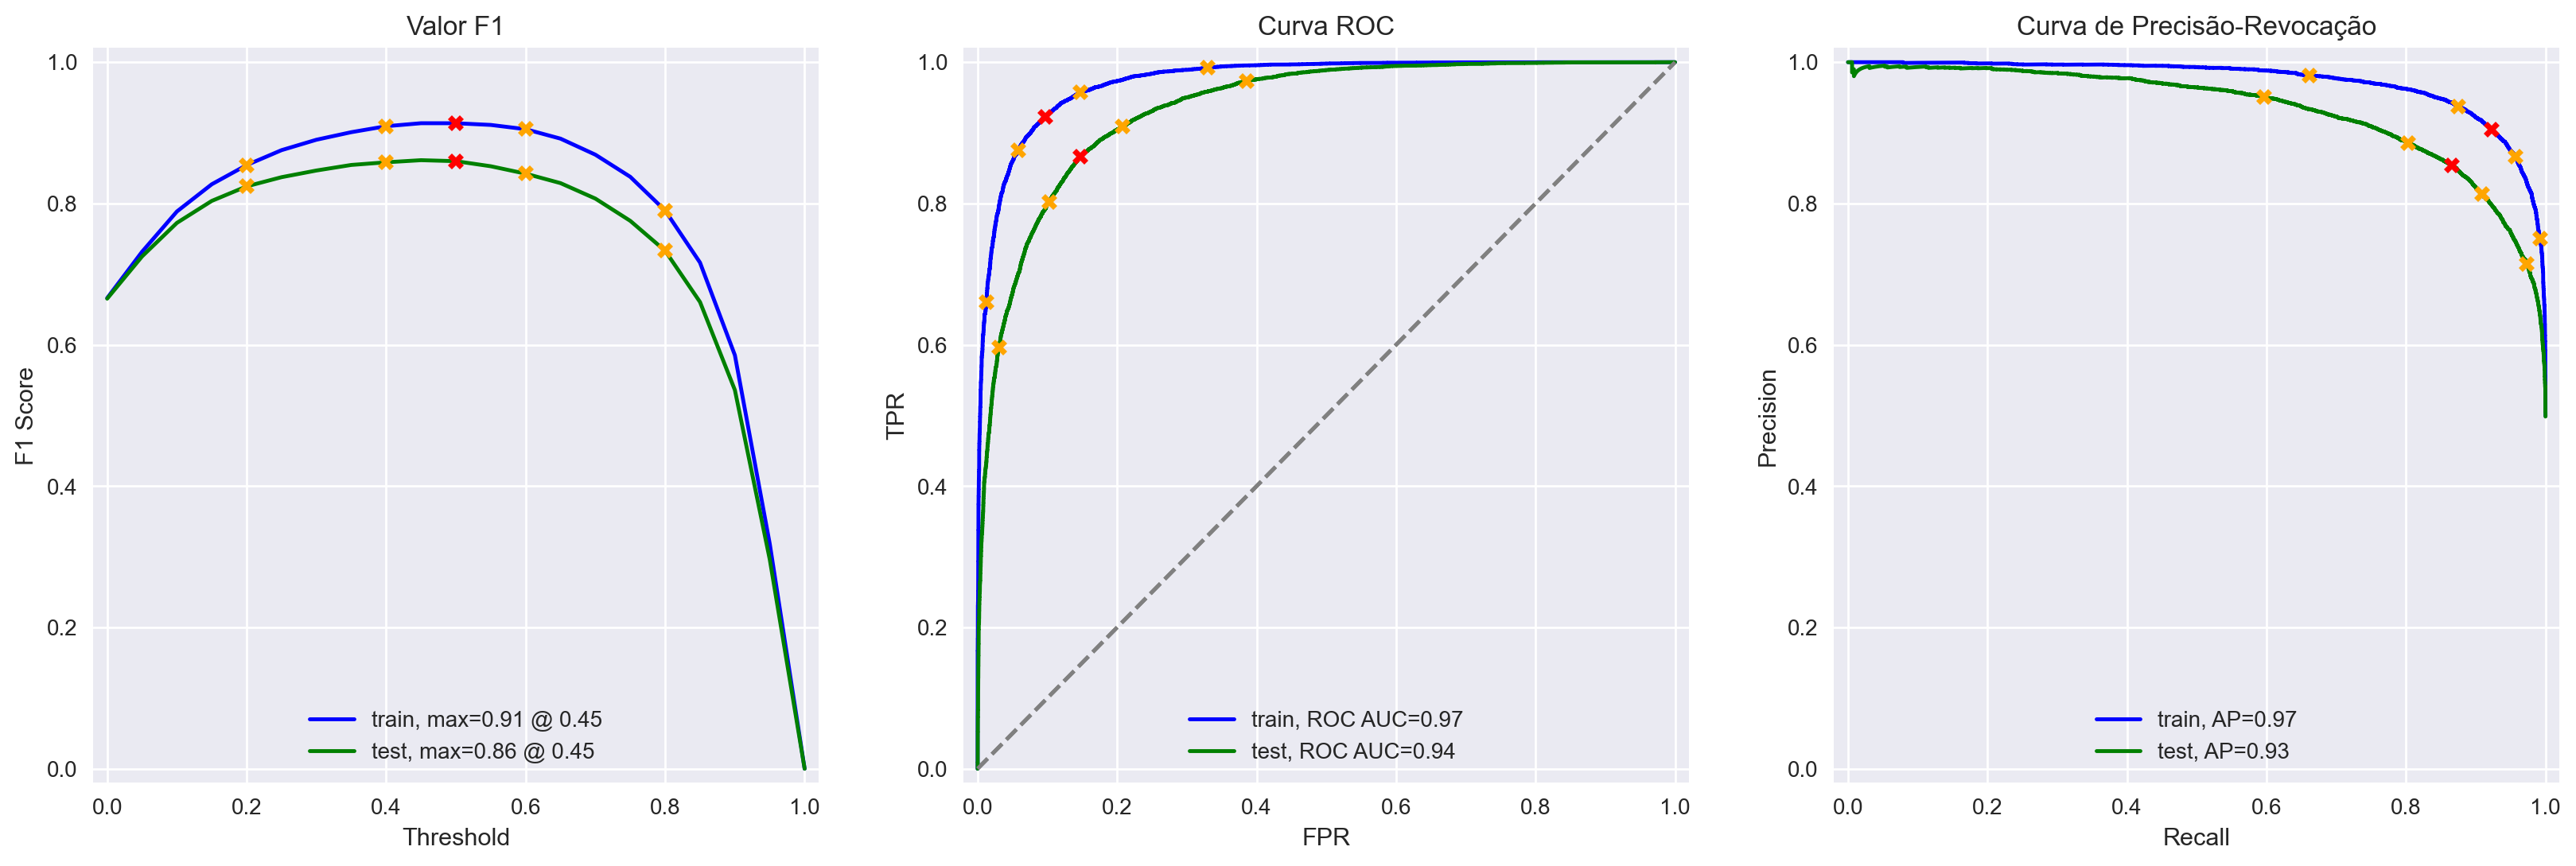

In [57]:
# Avalia o desempenho do modelo de classificação LightGBM
evaluate_model(modellgb, x_train_vec_4, train_target_4, x_test_vec_4, test_target_4)

O modelo 4 se mostrou suficiente para ultrapassar a meta de Acurácia.

###  Modelo 9 - BERT

In [58]:
# import torch
# import transformers

In [59]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [60]:
# def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
#     ids_list = []
#     attention_mask_list = []

#     # texto para IDs de tokens preenchidos com suas máscaras de atenção
    
    
#     # <coloque seu código aqui para criar ids_list e attention_mask_list>
#     for input_text in tqdm(texts, disable=disable_progress_bar):
#         ids_list = tokenizer.encode(
#         input_text.lower(),
#         add_special_tokens=True,
#         truncation=True,
#         max_length=max_length
#     )
#         padded = np.array(ids_list + [0] * (max_length - len(ids_list)))
#         attention_mask = np.where(padded != 0, 1, 0)
#         ids_list.append(padded)
#         attention_mask_list.append(attention_mask) 
    
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Usando o dispositivo {device}.')
    
#     # recebendo incorporações em lotes

#     embeddings = []

#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)].to(deviced)) 
            
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#     return np.concatenate(embeddings)

In [61]:
# Atenção! A execução do BERT para milhares de textos pode levar muito tempo na CPU, pelo menos várias horas
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [62]:
# test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

In [63]:
# train_target_9 = df_reviews_train['pos']
# test_target_9 = df_reviews_test['pos']

In [64]:
# print(df_reviews_train['review_norm'].shape)
# print(train_features_9.shape)
# print(train_target.shape)

In [65]:
# print(df_reviews_test['review_norm'].shape)
# print(test_features_9.shape)
# print(test_target.shape)

In [66]:
# tfidf_vectorizer_9 = TfidfVectorizer(stop_words=stop_words)

In [67]:
# x_train_vec_9 = tfidf_vectorizer_9.fit_transform(train_features_4)
# x_train_vec_9.shape

In [68]:
# lr.fit(x_train_vec_9,train_target_9)

In [69]:
# x_test_vec_9 = tfidf_vectorizer_9.transform(test_features_9)
# x_test_vec_9.shape

In [70]:
# evaluate_model(lr, x_train_vec_9, train_target_9, x_test_vec_9, test_target_9)

In [71]:
# se você tiver as incorporações, é aconselhável salvá-las para tê-las prontas se 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# e carregar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## Minhas Resenhas

In [72]:
# sinta-se à vontade para remover completamente essas resenhas e experimentar seus modelos nas suas próprias resenhas, as abaixo são apenas exemplos

my_reviews = pd.DataFrame([
    'I simply didn’t like it; it’s not my type of movie.',
    'Well, I got bored and fell asleep in the middle of the movie.',
    'I was really fascinated by the movie',    
    'The actors looked very old and uninterested, and yet they were paid to participate in the film. What a shameless money grab.',
    'I didn’t expect the new version to be so good! The writers really cared about the original material.',
    'The movie has its pros and cons, but I feel that overall it is a decent film. I can see myself going to watch it again.',
    'What a pathetic attempt at comedy. Not a single joke lands, everyone acts annoyingly and loudly; not even kids would like this!',
    'Releasing it on Netflix was a bold move, and I really appreciate being able to watch episode after episode of this exciting and smart new drama.'
], columns=['review'])

my_reviews = preprocess_reviews(my_reviews)
my_reviews = my_reviews.drop(['review'], axis=1)
my_reviews

,review_norm
0,i simply didn’t like it; it’s not my type of m...
1,"well, i got bored and fell asleep in the middl..."
2,i was really fascinated by the movie
3,"the actors looked very old and uninterested, a..."
4,i didn’t expect the new version to be so good!...
5,"the movie has its pros and cons, but i feel th..."
6,what a pathetic attempt at comedy. not a singl...
7,"releasing it on netflix was a bold move, and i..."


In [73]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Certifique-se de que as stop words estão disponíveis
stop_words = list(stopwords.words('english'))  # Converta para lista

# Cria um vetor TF-IDF com as stop words e sem limite de características
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stop_words, max_features=None)

# Ajusta o vetor TF-IDF aos dados de treinamento
x_train_vec_2 = tfidf_vectorizer_2.fit_transform(train_features_1)

# Treine o modelo de regressão logística com os dados transformados
lr_2 = LogisticRegression()
lr_2.fit(x_train_vec_2, train_target_1)  # Supondo que você tenha train_target_1 definido

LogisticRegression()

In [74]:
# Certifique-se de que as stop words estão disponíveis
stop_words = list(stopwords.words('english'))  # Converta para lista
tfidf_vectorizer_3 = TfidfVectorizer(stop_words=stop_words, max_features=None)  # max_features=None para usar todo o vocabulário

# Ajusta o vetor TF-IDF aos dados de treinamento
x_train_vec_3 = tfidf_vectorizer_3.fit_transform(train_features_3)

# Treine o modelo de regressão logística com os dados transformados
lr_3 = LogisticRegression()
lr_3.fit(x_train_vec_3, train_target_3)  # Supondo que você tenha train_target_3 definido


LogisticRegression()

In [75]:
# Certifique-se de que as stop words estão disponíveis
stop_words = list(stopwords.words('english'))  # Converta as stop words em uma lista

# Cria um vetor TF-IDF com as stop words e um número máximo de características
tfidf_vectorizer_4 = TfidfVectorizer(stop_words=stop_words, max_features=None)  # max_features=None para usar todo o vocabulário

# Ajusta o vetor TF-IDF aos dados de treinamento
x_train_vec_4 = tfidf_vectorizer_4.fit_transform(train_features_4)

lr_4 = LogisticRegression()
lr_4.fit(x_train_vec_4, train_target_4)  # Supondo que você tenha train_target_3 definido


LogisticRegression()

In [76]:
# stop_words = set(stopwords.words('englsh'))
# tfidf_vectorizer_9 = TfidfVectorizer(stop_words=stop_words)
# tfidf_vectorizer_9.fit_transform(train_features_9)

### Modelo 2

In [77]:
# Extraia os textos da coluna 'review_norm' do DataFrame my_reviews
texts = my_reviews['review_norm']

# Transforme os textos usando o vetor TF-IDF e obtenha as probabilidades de previsão do modelo
# O método predict_proba retorna as probabilidades para cada classe; [:, 1] seleciona a probabilidade da classe positiva
my_reviews_pred_prob_lr_2 = lr_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

# Imprima as previsões e os primeiros 100 caracteres de cada revisão
for i, review in enumerate(texts.str.slice(0, 100)):
    # Exibe a probabilidade prevista (formatada com duas casas decimais) e o texto da revisão correspondente
    print(f'{my_reviews_pred_prob_lr_2[i]:.2f}:  {review}')

0.27:  i simply didn’t like it; it’s not my type of movie.
0.18:  well, i got bored and fell asleep in the middle of the movie.
0.53:  i was really fascinated by the movie
0.16:  the actors looked very old and uninterested, and yet they were paid to participate in the film. what
0.22:  i didn’t expect the new version to be so good! the writers really cared about the original material.
0.64:  the movie has its pros and cons, but i feel that overall it is a decent film. i can see myself going
0.05:  what a pathetic attempt at comedy. not a single joke lands, everyone acts annoyingly and loudly; not
0.84:  releasing it on netflix was a bold move, and i really appreciate being able to watch episode after e


### Modelo 3

In [81]:
texts = my_reviews['review_norm']

# Transforme os textos usando o vetor TF-IDF (apenas transform)
texts_tfidf_3 = tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x)))

# Obtenha as probabilidades de previsão do modelo
my_reviews_pred_prob_lr_3 = lr_3.predict_proba(texts_tfidf_3)[:, 1]

# Imprima as previsões e os textos
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_lr_3[i]:.2f}:  {review}')

0.31:  i simply didn’t like it; it’s not my type of movie.
0.10:  well, i got bored and fell asleep in the middle of the movie.
0.59:  i was really fascinated by the movie
0.15:  the actors looked very old and uninterested, and yet they were paid to participate in the film. what
0.20:  i didn’t expect the new version to be so good! the writers really cared about the original material.
0.62:  the movie has its pros and cons, but i feel that overall it is a decent film. i can see myself going
0.05:  what a pathetic attempt at comedy. not a single joke lands, everyone acts annoyingly and loudly; not
0.95:  releasing it on netflix was a bold move, and i really appreciate being able to watch episode after e


### Modelo 4

In [82]:
texts = my_reviews['review_norm']

# Transforme os textos usando o vetor TF-IDF (apenas transform), aplicando pré-processamento nos textos
my_reviews_pred_prob_lr_4 = lr_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

# Imprima as previsões e os textos
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_lr_4[i]:.2f}:  {review}')

0.31:  i simply didn’t like it; it’s not my type of movie.
0.10:  well, i got bored and fell asleep in the middle of the movie.
0.59:  i was really fascinated by the movie
0.15:  the actors looked very old and uninterested, and yet they were paid to participate in the film. what
0.20:  i didn’t expect the new version to be so good! the writers really cared about the original material.
0.62:  the movie has its pros and cons, but i feel that overall it is a decent film. i can see myself going
0.05:  what a pathetic attempt at comedy. not a single joke lands, everyone acts annoyingly and loudly; not
0.95:  releasing it on netflix was a bold move, and i really appreciate being able to watch episode after e


### Modelo 9

In [83]:
# texts = my_reviews['review_norm']

# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# my_reviews_pred_prob = model.predict_proba(my_reviews_features_9)[:, 1]

# for i, review in enumerate(texts.str.slice(0, 100)):
#     print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

Dados os modelos para classificar resenhas como positivas e negativas com boas Acurácias. Com modelo em maior destaque Modelo 1 - NLTK, TF-IDF e Regressão Linear que teve maior sucesso.

## Conclusão geral <a id='end'></a>

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos e sklearn para criação do nosso modelo.

Realizamos o pre-processamento, para que não tivesse acontecido algum problema na criação do nosso modelo. Realizamos a AED para verificar o se havia o desbalanceamento de classe, O modelo com melhor desempenho foi o Modelo 1 - NLTK, TF-IDF e Regressão Linear, enquanto o com pior desempenho foi o Modelo 0 - Constante, Testamos o modelo de spaCy, TF-IDF e Regressão Linear e SpaCy, TF-IDF e LGBMClassifier.